In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import os, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime
import pickle
warnings.filterwarnings('ignore')


In [2]:
# Step 2: Load Dataset
df = pd.read_csv('shuffled_file.csv')
df = df.sample(frac=1)


In [3]:
# Step 3: Train-Test Split
train_size = int(0.8 * len(df))
train_set = df[:train_size]
test_set = df[train_size:]

y_train = train_set['label']
x_train = train_set.drop('label', axis=1)
y_test = test_set['label']
x_test = test_set.drop('label', axis=1)


In [4]:
# Step 4: Handle Imbalance
ros = RandomOverSampler()
x_train, y_train = ros.fit_resample(x_train, y_train)


In [5]:
# Step 5: Reshape and Normalize
x_train = np.array(x_train).reshape(-1, 28, 28, 3).astype('float32') / 255.0
x_test = np.array(x_test).reshape(-1, 28, 28, 3).astype('float32') / 255.0


In [6]:
# Step 6: Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)),
    MaxPool2D(), BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPool2D(), BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(), BatchNormalization(),
    
    Flatten(), Dropout(0.3),
    Dense(256, activation='relu'), BatchNormalization(), Dropout(0.3),
    Dense(128, activation='relu'), BatchNormalization(), Dropout(0.2),
    Dense(64, activation='relu'), BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,936 (1.03 MB)

 Trainable params: 267,592 (1.02 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [7]:
# Step 7: Setup Callbacks
callbacks = [
    ModelCheckpoint('best_skin_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6, verbose=1)
]

In [8]:
# Step 8: Train Model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5293 - loss: 1.3171
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.5297 - loss: 1.3159 - val_accuracy: 0.0000e+00 - val_loss: 5.8594 - learning_rate: 0.0010
Epoch 2/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8134 - loss: 0.5313
Epoch 2: val_accuracy improved from 0.00000 to 0.16586, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8135 - loss: 0.5310 - val_accuracy: 0.1659 - val_loss: 3.2543 - learning_rate: 0.0010
Epoch 3/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8776 - loss: 0.3479
Epoch 3: val_accuracy improved from 0.16586 to 0.50626, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8777 - loss: 0.3478 - val_accuracy: 0.5063 - val_loss: 1.3365 - learning_rate: 0.0010
Epoch 4/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9080 - loss: 0.2619
Epoch 4: val_accuracy improved from 0.50626 to 0.54775, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9080 - loss: 0.2618 - val_accuracy: 0.5478 - val_loss: 1.1060 - learning_rate: 0.0010
Epoch 5/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9253 - loss: 0.2108
Epoch 5: val_accuracy improved from 0.54775 to 0.61382, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9253 - loss: 0.2108 - val_accuracy: 0.6138 - val_loss: 0.9171 - learning_rate: 0.0010
Epoch 6/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9353 - loss: 0.1864
Epoch 6: val_accuracy did not improve from 0.61382
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9353 - loss: 0.1864 - val_accuracy: 0.4886 - val_loss: 1.5757 - learning_rate: 0.0010
Epoch 7/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9404 - loss: 0.1669
Epoch 7: val_accuracy improved from 0.61382 to 0.69205, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9404 - loss: 0.1669 - val_accuracy: 0.6920 - val_loss: 0.6461 - learning_rate: 0.0010
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9486 - loss: 0.1440
Epoch 8: val_accuracy did not improve from 0.69205
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9486 - loss: 0.1440 - val_accuracy: 0.5983 - val_loss: 0.9715 - learning_rate: 0.0010
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9509 - loss: 0.1378
Epoch 9: val_accuracy improved from 0.69205 to 0.71963, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9509 - loss: 0.1378 - val_accuracy: 0.7196 - val_loss: 0.6152 - learning_rate: 0.0010
Epoch 10/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9562 - loss: 0.1242
Epoch 10: val_accuracy did not improve from 0.71963
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9562 - loss: 0.1242 - val_accuracy: 0.5286 - val_loss: 1.1304 - learning_rate: 0.0010
Epoch 11/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9596 - loss: 0.1128
Epoch 11: val_accuracy did not improve from 0.71963
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9596 - loss: 0.1128 - val_accuracy: 0.7065 - val_loss: 0.8361 - learning_rate: 0.0010
Epoch 12/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9611 - loss: 0.1098
Epoch 12: val_accuracy did not improve from 0.71963
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9611 - loss: 0.1098 - val_accuracy: 0.4949 - val_loss: 1.5612 - learning_rate: 0.0010
Epoch 13

270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9661 - loss: 0.0997 - val_accuracy: 0.8157 - val_loss: 0.4257 - learning_rate: 0.0010
Epoch 14/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9658 - loss: 0.0966
Epoch 14: val_accuracy did not improve from 0.81572
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9658 - loss: 0.0966 - val_accuracy: 0.7373 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 15/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9694 - loss: 0.0851
Epoch 15: val_accuracy did not improve from 0.81572
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9694 - loss: 0.0851 - val_accuracy: 0.6836 - val_loss: 0.7140 - learning_rate: 0.0010
Epoch 16/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9716 - loss: 0.0820
Epoch 16: val_accuracy improved from 0.81572 to 0.85292, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9716 - loss: 0.0820 - val_accuracy: 0.8529 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 17/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9727 - loss: 0.0768
Epoch 17: val_accuracy did not improve from 0.85292
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9727 - loss: 0.0768 - val_accuracy: 0.8118 - val_loss: 0.3731 - learning_rate: 0.0010
Epoch 18/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9766 - loss: 0.0658
Epoch 18: val_accuracy did not improve from 0.85292
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9766 - loss: 0.0658 - val_accuracy: 0.7901 - val_loss: 0.4588 - learning_rate: 0.0010
Epoch 19/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9759 - loss: 0.0685
Epoch 19: val_accuracy improved from 0.85292 to 0.86312, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9759 - loss: 0.0685 - val_accuracy: 0.8631 - val_loss: 0.2975 - learning_rate: 0.0010
Epoch 20/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9747 - loss: 0.0713
Epoch 20: val_accuracy did not improve from 0.86312
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9747 - loss: 0.0713 - val_accuracy: 0.8060 - val_loss: 0.4229 - learning_rate: 0.0010
Epoch 21/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9767 - loss: 0.0636
Epoch 21: val_accuracy did not improve from 0.86312
270/270 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9767 - loss: 0.0636 - val_accuracy: 0.8520 - val_loss: 0.3499 - learning_rate: 0.0010
Epoch 22/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9789 - loss: 0.0584
Epoch 22: val_accuracy did not improve from 0.86312
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9789 - loss: 0.0584 - val_accuracy: 0.7581 - val_loss: 0.4994 - learning_rate: 0.0010
Epoch 23

270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9799 - loss: 0.0557 - val_accuracy: 0.9465 - val_loss: 0.1341 - learning_rate: 0.0010
Epoch 24/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9831 - loss: 0.0496
Epoch 24: val_accuracy did not improve from 0.94645
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9830 - loss: 0.0496 - val_accuracy: 0.8953 - val_loss: 0.2760 - learning_rate: 0.0010
Epoch 25/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9814 - loss: 0.0550
Epoch 25: val_accuracy did not improve from 0.94645
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9814 - loss: 0.0551 - val_accuracy: 0.8034 - val_loss: 0.4085 - learning_rate: 0.0010
Epoch 26/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9813 - loss: 0.0555
Epoch 26: val_accuracy did not improve from 0.94645
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9813 - loss: 0.0555 - val_accuracy: 0.9025 - val_loss: 0.2726 - learning_rate: 0.0010
Epoch 27

270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9870 - loss: 0.0393 - val_accuracy: 0.9474 - val_loss: 0.1326 - learning_rate: 0.0010
Epoch 29/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9841 - loss: 0.0440
Epoch 29: val_accuracy did not improve from 0.94738
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9841 - loss: 0.0440 - val_accuracy: 0.5311 - val_loss: 1.7876 - learning_rate: 0.0010
Epoch 30/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9837 - loss: 0.0473
Epoch 30: val_accuracy did not improve from 0.94738
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9837 - loss: 0.0473 - val_accuracy: 0.8822 - val_loss: 0.2570 - learning_rate: 0.0010
Epoch 31/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9851 - loss: 0.0413
Epoch 31: val_accuracy did not improve from 0.94738
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9851 - loss: 0.0413 - val_accuracy: 0.8693 - val_loss: 0.3825 - learning_rate: 0.0010
Epoch 32

270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9879 - loss: 0.0333 - val_accuracy: 0.9817 - val_loss: 0.0607 - learning_rate: 0.0010
Epoch 34/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9864 - loss: 0.0379
Epoch 34: val_accuracy did not improve from 0.98169
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9864 - loss: 0.0379 - val_accuracy: 0.9811 - val_loss: 0.0497 - learning_rate: 0.0010
Epoch 35/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9872 - loss: 0.0362
Epoch 35: val_accuracy did not improve from 0.98169
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9872 - loss: 0.0362 - val_accuracy: 0.9498 - val_loss: 0.1378 - learning_rate: 0.0010
Epoch 36/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9875 - loss: 0.0362
Epoch 36: val_accuracy did not improve from 0.98169
270/270 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9875 - loss: 0.0362 - val_accuracy: 0.8310 - val_loss: 0.4188 - learning_rate: 0.0010
Epoch 37

270/270 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.9923 - loss: 0.0224 - val_accuracy: 0.9948 - val_loss: 0.0194 - learning_rate: 3.0000e-04
Epoch 41/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9956 - loss: 0.0130
Epoch 41: val_accuracy improved from 0.99478 to 0.99803, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9980 - val_loss: 0.0120 - learning_rate: 3.0000e-04
Epoch 42/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 42: val_accuracy improved from 0.99803 to 0.99977, saving model to best_skin_model.h5


270/270 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9998 - val_loss: 0.0038 - learning_rate: 3.0000e-04
Epoch 43/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9969 - loss: 0.0094
Epoch 43: val_accuracy did not improve from 0.99977
270/270 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.9940 - val_loss: 0.0168 - learning_rate: 3.0000e-04
Epoch 44/50
269/270 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9965 - loss: 0.0104
Epoch 44: val_accuracy did not improve from 0.99977
270/270 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9921 - val_loss: 0.0250 - learning_rate: 3.0000e-04
Epoch 45/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9968 - loss: 0.0086
Epoch 45: val_accuracy did not improve from 0.99977
270/270 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9968 - loss: 0.0086 - val_accuracy: 0.9961 - val_loss: 0.0168 - learning_rate: 3.0

270/270 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0016 - learning_rate: 3.0000e-04
Epoch 48/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9980 - loss: 0.0073
Epoch 48: val_accuracy did not improve from 1.00000
270/270 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.9980 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 0.0012 - learning_rate: 3.0000e-04
Epoch 49/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9972 - loss: 0.0089
Epoch 49: val_accuracy did not improve from 1.00000
270/270 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 5.8226e-04 - learning_rate: 3.0000e-04
Epoch 50/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9975 - loss: 0.0065
Epoch 50: val_accuracy did not improve from 1.00000
270/270 ━━━━━━━━━━━━━━━━━━━━ 27s 99ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.9802 - val_loss: 0.0494 - learning_rate:

In [9]:
# Step 9: Save Final Model
model.save('final_skin_model.h5')
# Also save the model using pickle for backup
with open('final_skin_model.pkl', 'wb') as f:
    pickle.dump(model, f)


94/94 - 1s - 8ms/step - accuracy: 0.8565 - loss: 0.7744
Test Accuracy: 0.8565


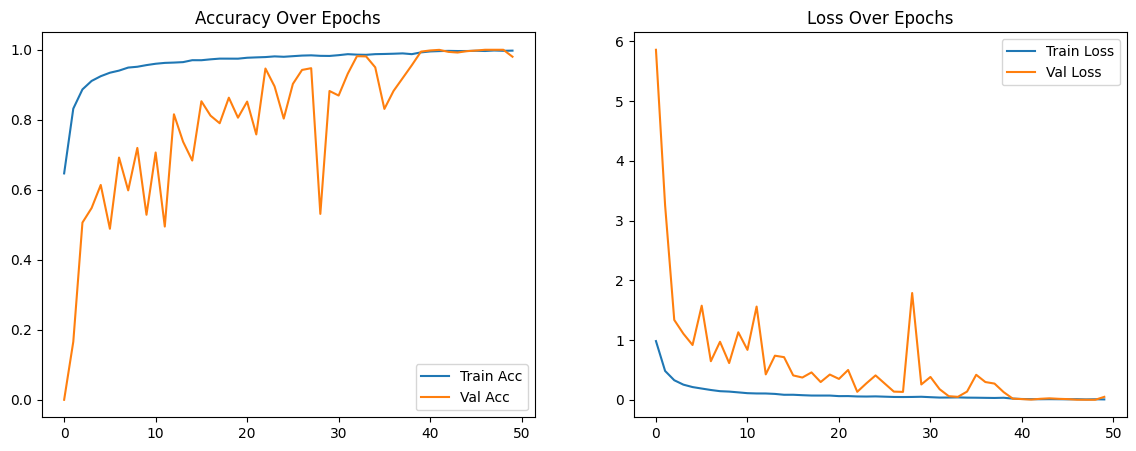

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


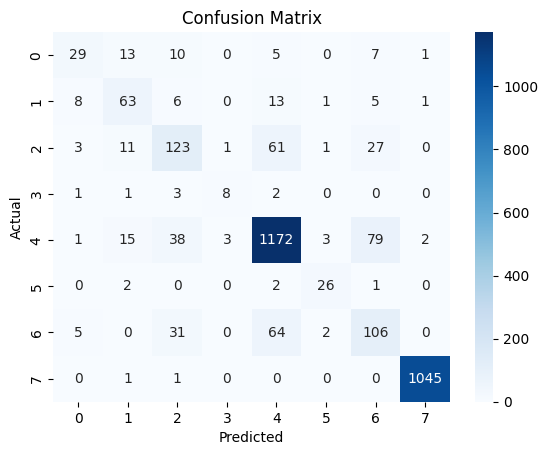

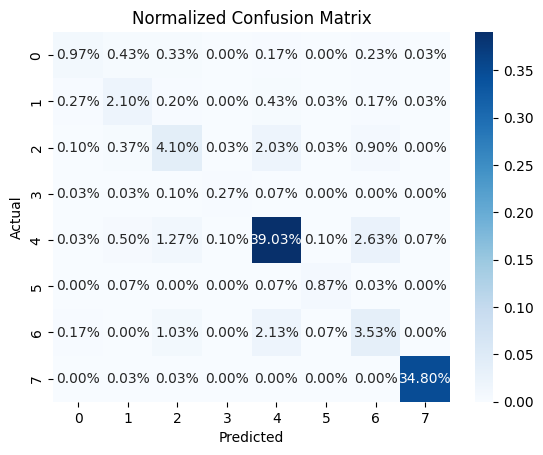

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52        65
           1       0.59      0.65      0.62        97
           2       0.58      0.54      0.56       227
           3       0.67      0.53      0.59        15
           4       0.89      0.89      0.89      1313
           5       0.79      0.84      0.81        31
           6       0.47      0.51      0.49       208
           7       1.00      1.00      1.00      1047

    accuracy                           0.86      3003
   macro avg       0.70      0.68      0.69      3003
weighted avg       0.86      0.86      0.86      3003



In [10]:
# Step 10: Evaluation
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")
# Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalized Confusion Matrix
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))



In [13]:
# Step 11: Predict Function on New Image
def predict_skin_class(image_path):
    from PIL import Image
    img = Image.open(image_path).resize((28, 28))
    img = np.array(img).reshape(1, 28, 28, 3).astype('float32') / 255.0
    pred = model.predict(img)
    class_id = np.argmax(pred)
    classes = {
        0: 'Actinic Keratoses (akiec)',
        1: 'Basal Cell Carcinoma (bcc)',
        2: 'Benign Keratosis-like Lesions (bkl)',
        3: 'Dermatofibroma (df)',
        4: 'Melanocytic Nevi (nv)',
        5: 'Vascular Lesions (vasc)',
        6: 'Melanoma (mel)',
        7: 'Unknown (unkm)'
    }
    return classes[class_id], round(float(np.max(pred)) * 100, 2)

# Example usage:
label, confidence = predict_skin_class('cq5dam.web.1280.1280 (5).jpeg')
print(f"Predicted: {label} ({confidence}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted: Melanocytic Nevi (nv) (82.82%)
